## Digit recognizer competition from Kaggle, development of a Convolutional Neural Network

### Load libraries

In [3]:
import pandas as pd
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


### Load Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Analyze our dataset, identify our goal feature and missing values

In [5]:
# Label feature is our goal
Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)

# We can observe that our goal have similar counts
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

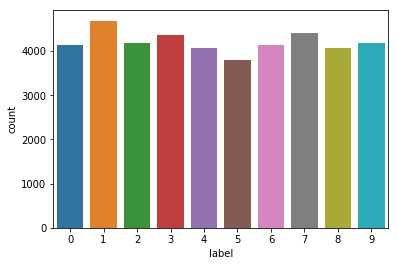

In [4]:
fig = sns.countplot(Y_train)

In [5]:
# There are not missing values in train dataset
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
# There are not missing values in test dataset
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


### Data cleaning

In [6]:
# Normalization (divided by 255 because it is a gray scale)
X_train = X_train/255
test = test/255

In [7]:
# We have 784 pixels by image, it means 28px x 28px (height x width)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Our goal will be encode to one hot vector (10 numbers including 0) 
Y_train = to_categorical(Y_train, num_classes = 10)

# Split our train dataset in [train (85%), validation (15%)]
X_train, X_validation, Y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.15)

### Development of CNN

In [8]:
# Initialization of CNN
model = Sequential()

#Convolutional layer in 2D because are gray scale images with 32 filters (32 convolution filters to get an output image)
model.add(Convolution2D(32, kernel_size=(3,3), activation='relu'))

#Pooling layer (Pooling is used to reduce the image size to 2x2)
model.add(MaxPooling2D(pool_size=(2,2)))

#Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored 
#(setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and 
#forces the network to learn features in a distributed way. This technique also improves generalization and 
#reduces the overfitting.
model.add(Dropout(0.5))

#Flatten layer converts the final feature maps into a single 1D vector
model.add(Flatten())

# Two fully-connected layers which is an ANN (Artificial Neural Network) classifier
# The rectifier activation function is used to add non linearity to the network.
model.add(Dense(output_dim=128, activation='relu'))
# Sigmoid activation function
model.add(Dense(output_dim=10, activation='sigmoid'))

# Compile the model, Accuracy metric is to evaluate the training of model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\x283559\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\x283559\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`


Training model

In [9]:
batch_size=86
epochs=3

In [10]:
fitting = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_validation, y_validation))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 35700 samples, validate on 6300 samples
Epoch 1/3
35700/35700 [==============================] - 43s 1ms/step - loss: 0.3316 - acc: 0.9038 - val_loss: 0.1160 - val_acc: 0.9662
Epoch 2/3
35700/35700 [==============================] - 47s 1ms/step - loss: 0.1245 - acc: 0.9625 - val_loss: 0.0836 - val_acc: 0.9725
Epoch 3/3
35700/35700 [==============================] - 47s 1ms/step - loss: 0.0896 - acc: 0.9716 - val_loss: 0.0640 - val_acc: 0.9792


Evaluate the model

In [12]:
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results,name="Label")

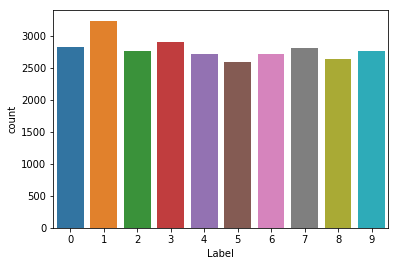

In [13]:
sns.countplot(results)

In [14]:
submission = pd.concat([pd.Series(range(1,28001), name='Image_Id'), results], axis=1)
submission.to_csv('./submission.csv', index=False)